In [2]:
import numpy as np 
import pandas as pd 

from collections import Counter
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/U.S.%20Supermarket%20Data/50_SupermarketBranches.csv')

print(df.shape)
df.head()

(50, 5)


,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
for c in ('Advertisement Spend', 'Promotion Spend', 'Administration Spend', 'Profit'):
    df[c] = df[c] / 1000

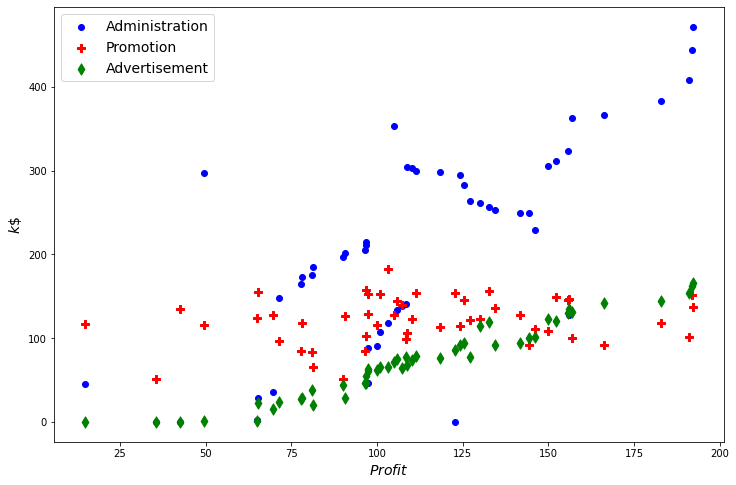

In [5]:
plt.figure(figsize=(12, 8))

plt.scatter(df.Profit.values, df['Administration Spend'].values, c='blue', label='Administration')
plt.scatter(df.Profit.values, df['Promotion Spend'].values, c='red', label='Promotion', marker='P', s=64)
plt.scatter(df.Profit.values, df['Advertisement Spend'].values, c='green', label='Advertisement', marker='d', s=64)

plt.xlabel('$Profit$', fontsize=14)
plt.ylabel('$k\$$', fontsize=14)

plt.legend(fontsize=14)

<AxesSubplot:>

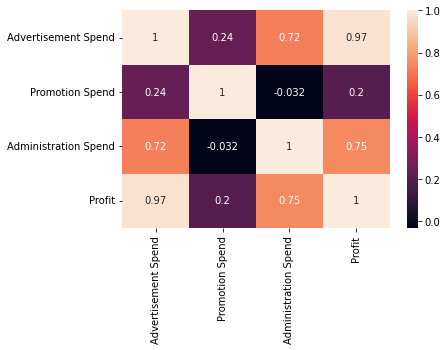

In [6]:
sns.heatmap(df[['Advertisement Spend', 'Promotion Spend', 'Administration Spend', 'Profit']].corr(),
            annot=True)

<AxesSubplot:title={'center':'correlations of Profit with Spends by States'}, xlabel='State'>

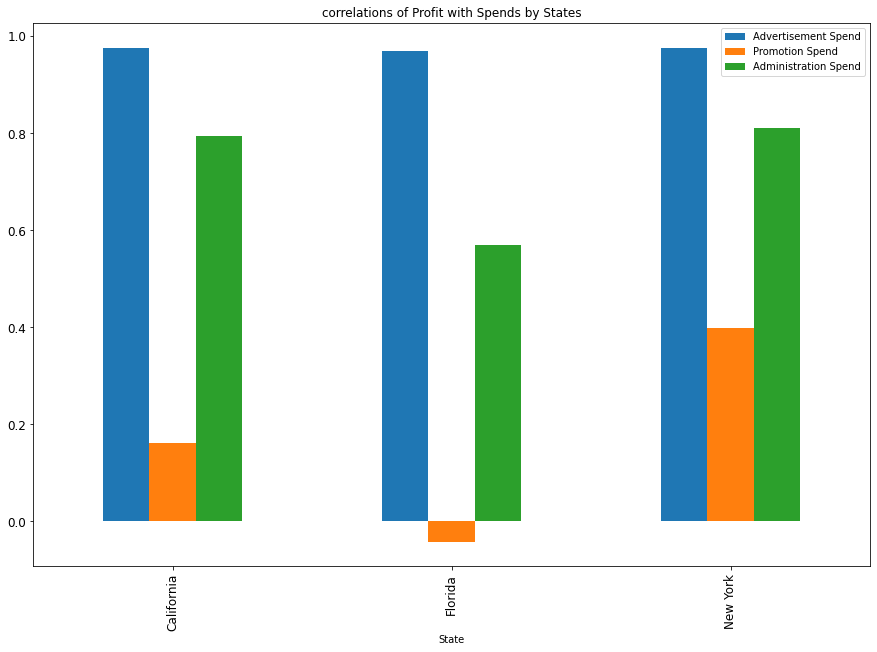

In [7]:
df.groupby('State').corr()[['Profit']].unstack(level=1)['Profit'][['Advertisement Spend', 'Promotion Spend', 'Administration Spend']].plot(kind='bar', title ="correlations of Profit with Spends by States", figsize=(15, 10), legend=True, fontsize=12)

In [8]:
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/U.S.%20Supermarket%20Data/Ads_CTR_Optimisation.csv')

print(df2.shape)
df2.head()

(10000, 10)


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


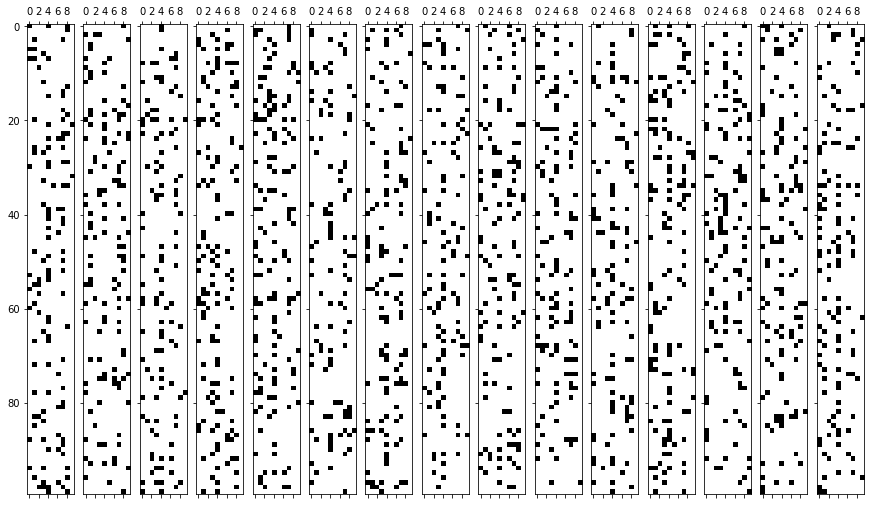

In [9]:
_, ax = plt.subplots(1, 15, figsize=(15, 10), sharey=True)

for i in range(15):
    ax[i].spy(df2.values[i * 100:(i + 1) * 100, :])

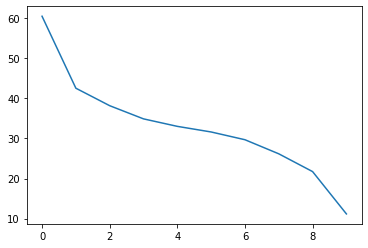

In [10]:
u, s, vh = np.linalg.svd(df2.values)
plt.plot(s)

Text(0, 0.5, 'count')

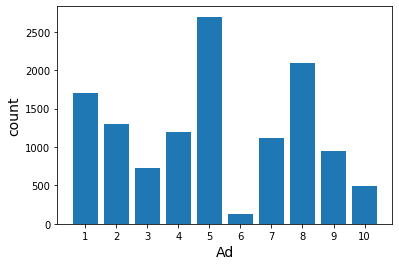

In [11]:
plt.bar(range(1, 11), df2.sum(axis=0))

plt.xticks(range(1, 11))
plt.xlabel('Ad', fontsize=14)
plt.ylabel('count', fontsize=14)

Text(0, 0.5, 'count')

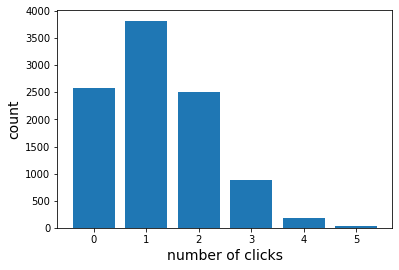

In [12]:
hs, xs = np.histogram(df2.sum(axis=1), bins=np.arange(7) - 0.5)
plt.bar(xs[:-1] + 0.5, hs)

plt.xlabel('number of clicks', fontsize=14)
plt.ylabel('count', fontsize=14)

In [ ]:
df3 = pd.read_csv('/kaggle/input/marketing-data-for-a-supermarket-in-united-states/supermarket_marketing/Supermarket_CustomerMembers.csv', index_col='CustomerID')

print(df3.shape)
df3.head()